In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns
from sklearn.model_selection import train_test_split


# Load data

In [203]:
from sklearn.datasets import load_breast_cancer

In [205]:
cancer_dataset = load_breast_cancer()

In [207]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [209]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [211]:
cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [213]:
dataset = pd.DataFrame(np.c_[cancer_dataset["data"],cancer_dataset["target"]],
                       columns = np.append(cancer_dataset["feature_names"],["class"]))

In [215]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [217]:
cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

We want to predict the risk of cancer, so we should convert malignant is 1 and benign is 0

In [220]:
dataset["class"] = dataset["class"].replace({0:1,1:0})
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0


#  Exploratory Data Analysis (EDA)

In [223]:
dataset.shape

(569, 31)

In [225]:
#check null/ missing value
dataset.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [227]:
# check duplicate value
dataset.duplicated().any()

False

In [229]:
# check class distribution
dataset["class"].value_counts()

class
0.0    357
1.0    212
Name: count, dtype: int64

We can see that our dataset looks balanced, so we don't need to proceed with addressing imbalanced data.

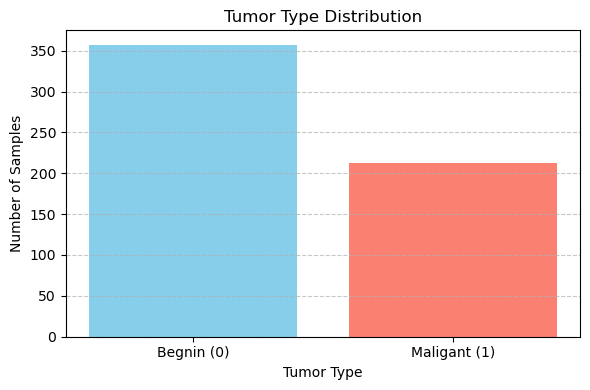

In [232]:
value_counts = dataset["class"].value_counts()
#create labels for better understanding
labels = ["Begnin (0)","Maligant (1)"]
plt.figure(figsize=(6, 4))
plt.bar(labels, value_counts, color=['skyblue', 'salmon'])
plt.title('Tumor Type Distribution')
plt.ylabel('Number of Samples')
plt.xlabel('Tumor Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

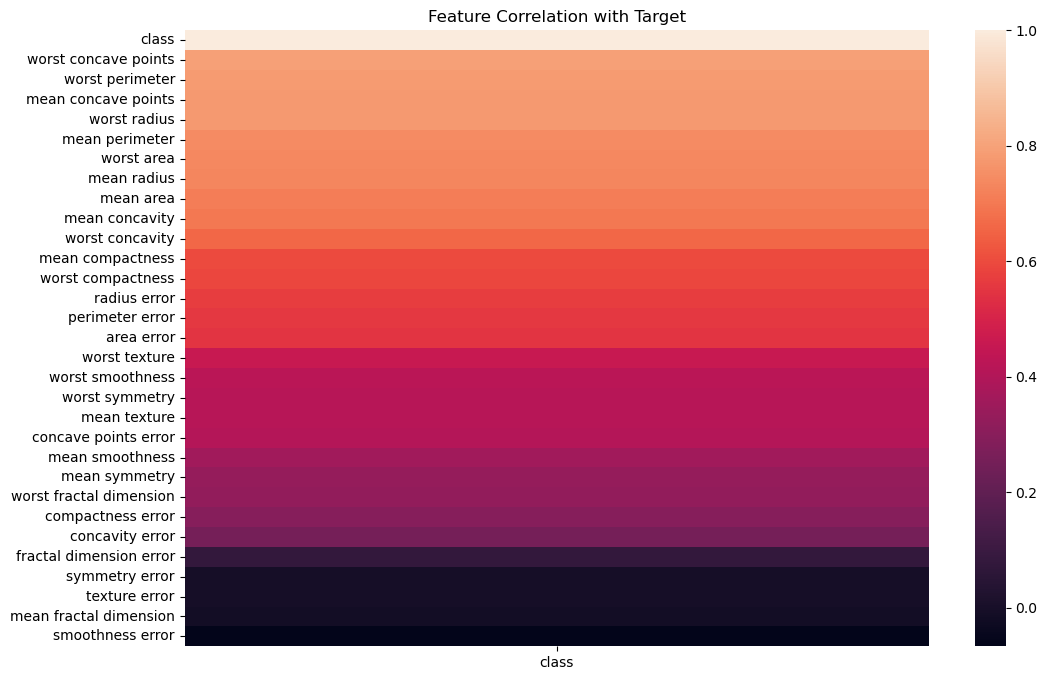

In [234]:
# Correlation Heatmap
corr = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['class']].sort_values(by='class', ascending=False))
plt.title("Feature Correlation with Target")
plt.show()

In [236]:
corr = dataset.corr()["class"]
corr

mean radius                0.730029
mean texture               0.415185
mean perimeter             0.742636
mean area                  0.708984
mean smoothness            0.358560
mean compactness           0.596534
mean concavity             0.696360
mean concave points        0.776614
mean symmetry              0.330499
mean fractal dimension    -0.012838
radius error               0.567134
texture error             -0.008303
perimeter error            0.556141
area error                 0.548236
smoothness error          -0.067016
compactness error          0.292999
concavity error            0.253730
concave points error       0.408042
symmetry error            -0.006522
fractal dimension error    0.077972
worst radius               0.776454
worst texture              0.456903
worst perimeter            0.782914
worst area                 0.733825
worst smoothness           0.421465
worst compactness          0.590998
worst concavity            0.659610
worst concave points       0

In [238]:
#select predictors
predictors = []
for feature, value in corr.items():
    if abs(value) >= 0.5 and feature != "class":
        predictors.append(feature)
#abs no matter positively or négavtively number    

In [240]:
predictors 

['mean radius',
 'mean perimeter',
 'mean area',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'radius error',
 'perimeter error',
 'area error',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst compactness',
 'worst concavity',
 'worst concave points']

In [242]:
selected_columns = predictors + ["class"]
dataset = dataset[selected_columns].copy()

In [244]:
dataset

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,class
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654,1.0
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860,1.0
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430,1.0
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575,1.0
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216,1.0
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628,1.0
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418,1.0
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650,1.0


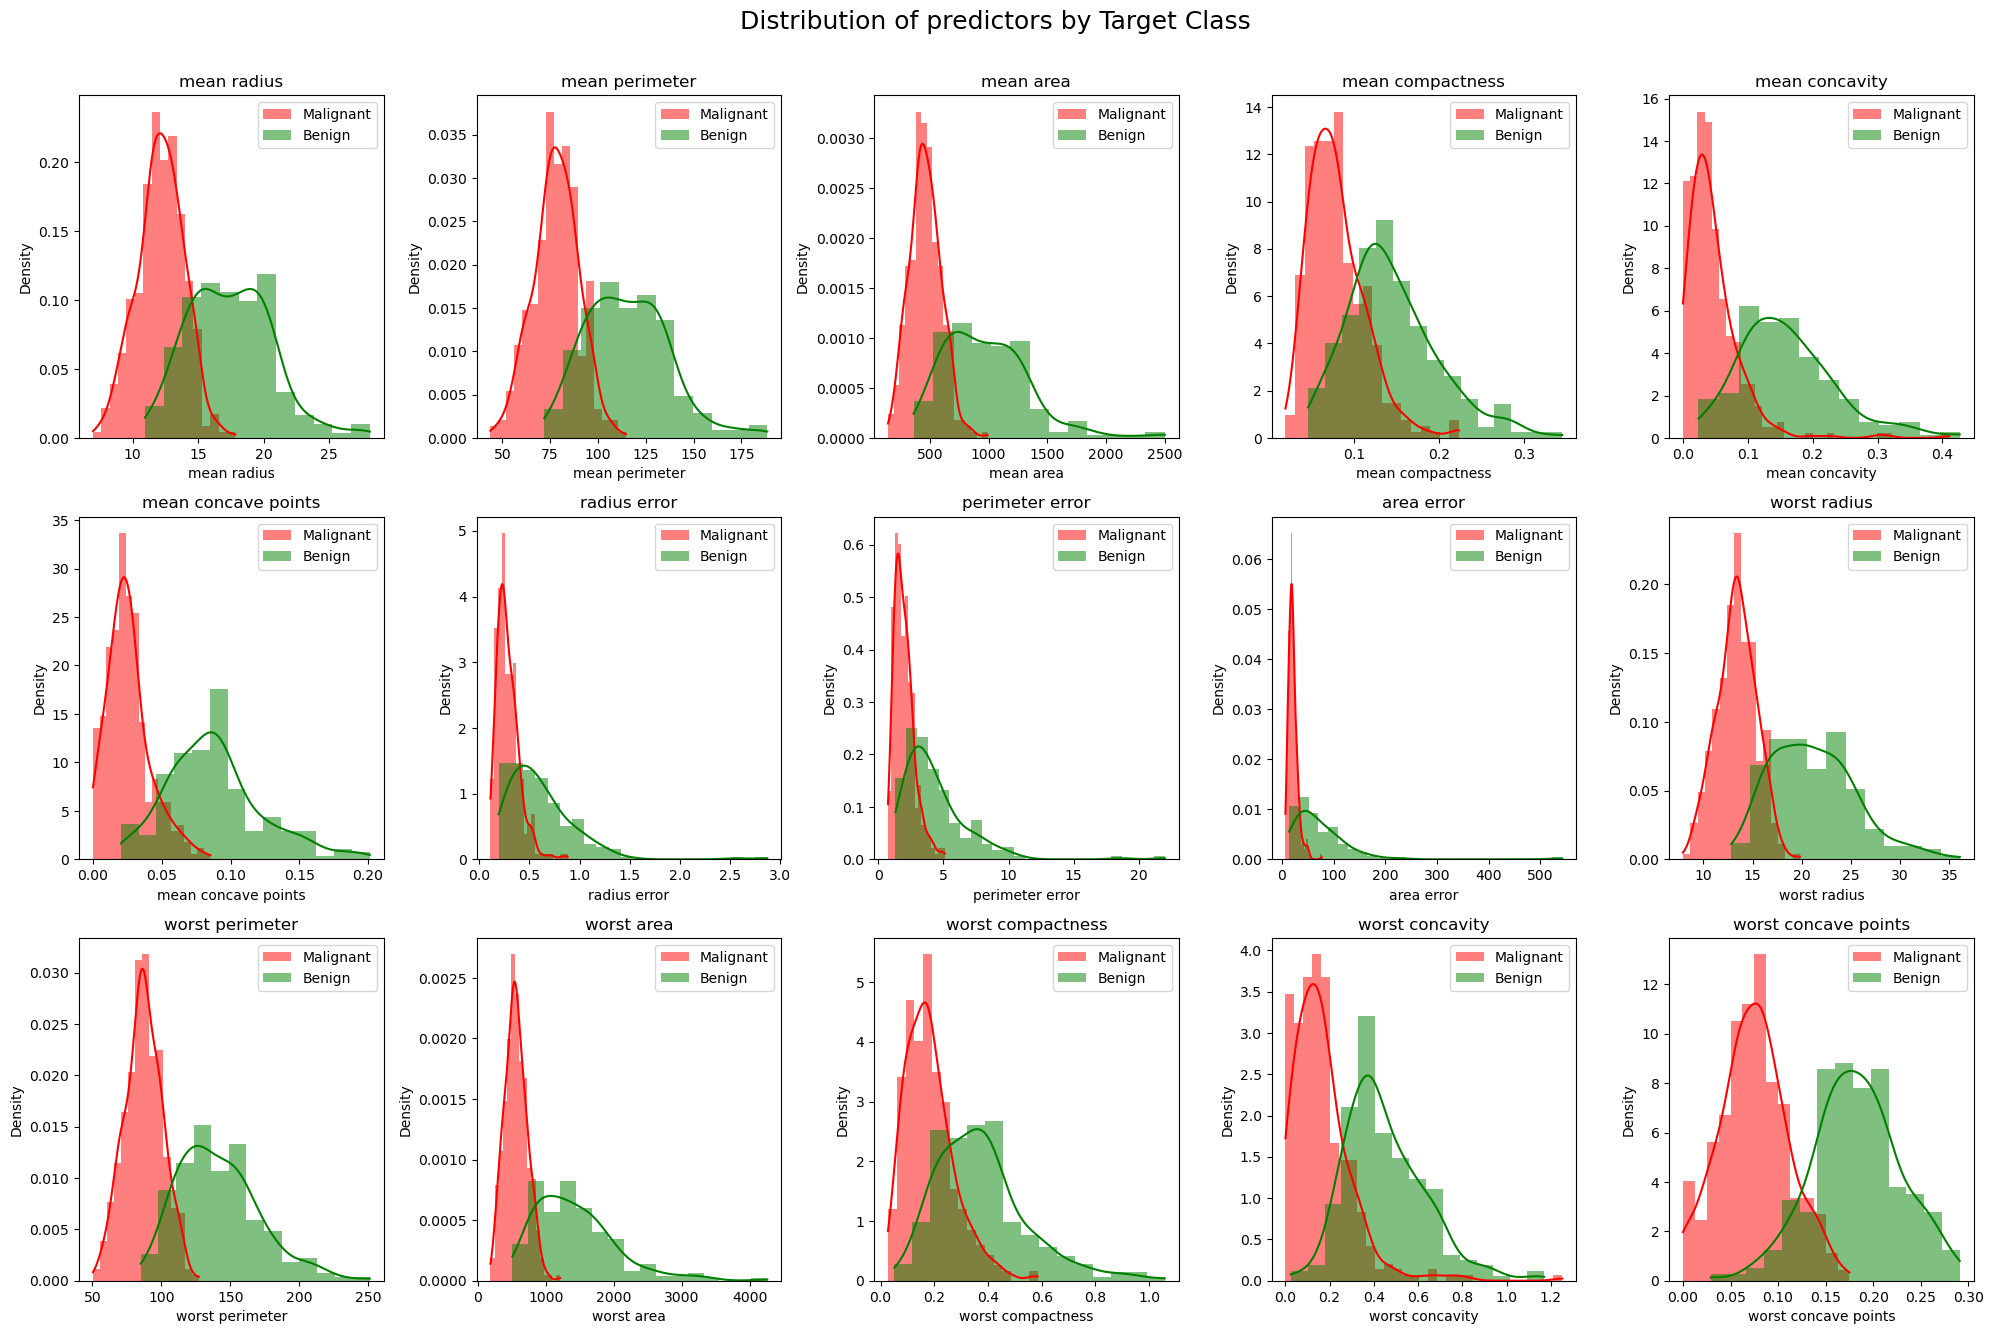

In [246]:
# Visualize feature distributions by target class

plt.figure(figsize=(20, 25))
for i, feature in enumerate(predictors):
    plt.subplot(6, 5, i + 1)
    sns.histplot(dataset[dataset['class'] == 0][feature], color='red', kde=True, stat="density", linewidth=0, label='Malignant')
    sns.histplot(dataset[dataset['class'] == 1][feature], color='green', kde=True, stat="density", linewidth=0, label='Benign')
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.suptitle('Distribution of predictors by Target Class', y=1.02, fontsize=18)
plt.show()

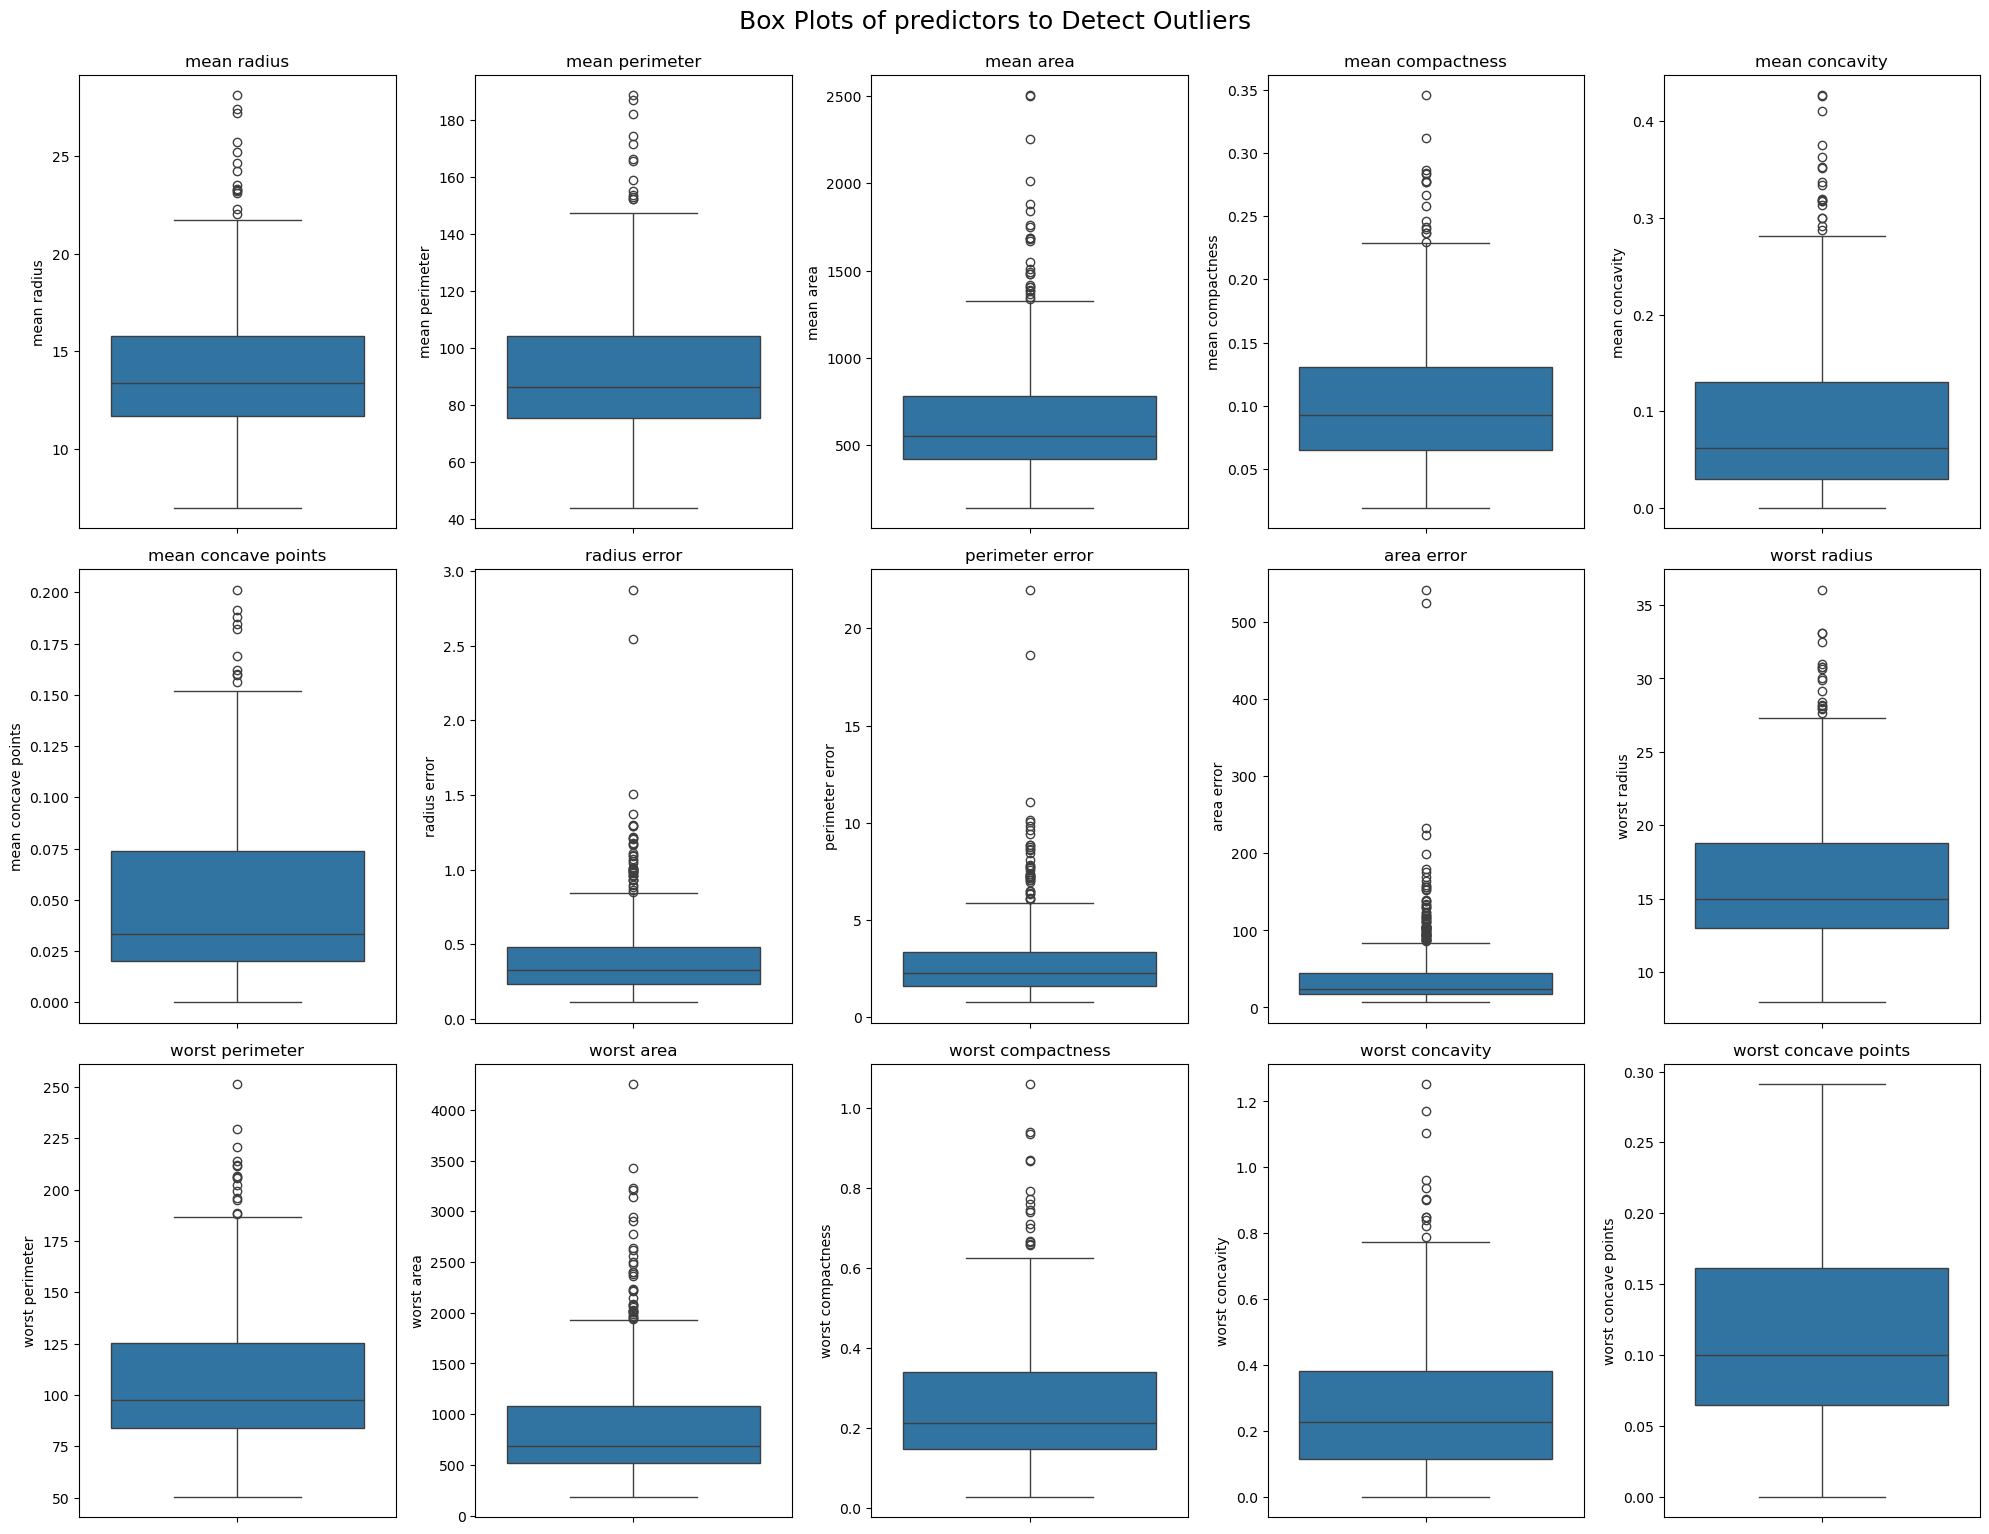

In [247]:
# detect outliers
plt.figure(figsize=(20, 15))
for i, feature in enumerate(predictors):
    plt.subplot(3, 5, i + 1) # Adjust subplot grid based on number of features (15 features -> 3 rows, 5 cols)
    sns.boxplot(y=dataset[feature])
    plt.title(feature)
plt.tight_layout()
plt.suptitle('Box Plots of predictors to Detect Outliers', y=1.02, fontsize=18)
plt.show()

In [250]:
def handle_outliers(df, threshold_low=5, threshold_high=10):
    df_cleaned = df.copy()
    total_rows = len(df)
    outlier_decision = {}

    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        mask_outliers = (df[col] < lower) | (df[col] > upper)
        percent_outliers = (mask_outliers.sum() / total_rows) * 100

        if percent_outliers < threshold_low:
            # Remove if % outliers < 5%
            df_cleaned = df_cleaned[~mask_outliers]
            outlier_decision[col] = f"Removed rows (<{threshold_low}%)"
        elif threshold_low <= percent_outliers <= threshold_high:
            # CAPPING: thay thế outliers bằng giới hạn if % outliers in range (5%,10%)
            df_cleaned[col] = df_cleaned[col].clip(lower, upper)
            outlier_decision[col] = f"Capped values ({threshold_low}-{threshold_high}%)"
        else:
            # keep if > 10%
            outlier_decision[col] = "Kept as-is (>10%)"

    return df_cleaned.reset_index(drop=True), pd.Series(outlier_decision, name="Outlier Handling Strategy")

In [252]:
X = dataset[predictors]  # hoặc df chứa features
X_cleaned, handling_summary = handle_outliers(X)

print(handling_summary)

mean radius                Removed rows (<5%)
mean perimeter             Removed rows (<5%)
mean area                  Removed rows (<5%)
mean compactness           Removed rows (<5%)
mean concavity             Removed rows (<5%)
mean concave points        Removed rows (<5%)
radius error            Capped values (5-10%)
perimeter error         Capped values (5-10%)
area error                  Kept as-is (>10%)
worst radius               Removed rows (<5%)
worst perimeter            Removed rows (<5%)
worst area              Capped values (5-10%)
worst compactness          Removed rows (<5%)
worst concavity            Removed rows (<5%)
worst concave points       Removed rows (<5%)
Name: Outlier Handling Strategy, dtype: object


/var/folders/j2/st7l9scn7yx12mlzqj137kj40000gn/T/ipykernel_82357/508871322.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~mask_outliers]
/var/folders/j2/st7l9scn7yx12mlzqj137kj40000gn/T/ipykernel_82357/508871322.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~mask_outliers]
/var/folders/j2/st7l9scn7yx12mlzqj137kj40000gn/T/ipykernel_82357/508871322.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~mask_outliers]
/var/folders/j2/st7l9scn7yx12mlzqj137kj40000gn/T/ipykernel_82357/508871322.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~mask_outliers]
/var/folders/j2/st7l9scn7yx12mlzqj137kj40000gn/T/ipykernel_82357/508871322.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~mask_outliers]


In [254]:
X_cleaned

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1937.05,0.18660,0.2416,0.1860
1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.00,0.42450,0.4504,0.2430
2,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.00,0.20500,0.4000,0.1625
3,12.45,82.57,477.1,0.17000,0.15780,0.08089,0.3345,2.217,27.19,15.470,103.40,741.60,0.52490,0.5355,0.1741
4,18.25,119.60,1040.0,0.10900,0.11270,0.07400,0.4467,3.180,53.91,22.880,153.20,1606.00,0.25760,0.3784,0.1932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,14.05,91.38,600.4,0.11260,0.04462,0.04304,0.3645,2.888,29.84,15.300,100.20,706.70,0.22640,0.1326,0.1048
515,11.20,70.67,386.0,0.03558,0.00000,0.00000,0.3141,2.041,22.81,11.920,75.19,439.60,0.05494,0.0000,0.0000
516,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.00,0.19220,0.3215,0.1628
517,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.00,0.30940,0.3403,0.1418


In [256]:
# STEP 4: Lọc lại toàn bộ df theo index của X_cleaned (giữ lại cả 'class')
df_cleaned = df.loc[X_cleaned.index].reset_index(drop=True)

In [258]:
df_cleaned 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,0.05915,...,28.06,113.80,967.0,0.1246,0.2101,0.2866,0.11200,0.2282,0.06954,1.0
515,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,...,23.03,79.15,478.6,0.1483,0.1574,0.1624,0.08542,0.3060,0.06783,0.0
516,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,0.05941,...,26.20,142.20,1493.0,0.1492,0.2536,0.3759,0.15100,0.3074,0.07863,1.0
517,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,...,25.23,160.50,1646.0,0.1417,0.3309,0.4185,0.16130,0.2549,0.09136,1.0


# Data Preprocessing

### Split X, y

In [275]:
X = df_cleaned[predictors]
y = df_cleaned["class"]

In [277]:
X = dataset[predictors]
y = dataset["class"]

### Split dataset

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

### Feature scaling

In [283]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training model

### Logistic Regression

In [287]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [289]:
y_prob = log.predict_proba(X_test)
y_prob[0:10]

array([[4.34683668e-04, 9.99565316e-01],
       [9.94233629e-01, 5.76637079e-03],
       [8.43081986e-01, 1.56918014e-01],
       [9.94589977e-01, 5.41002265e-03],
       [9.98224986e-01, 1.77501398e-03],
       [5.97470073e-10, 9.99999999e-01],
       [9.70920273e-01, 2.90797270e-02],
       [9.98755080e-01, 1.24492003e-03],
       [6.58357777e-01, 3.41642223e-01],
       [9.78362760e-01, 2.16372403e-02]])

In [165]:
y_pred = log.predict(X_test)
y_pred[0:10]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [291]:
# evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        66
         1.0       0.96      0.92      0.94        48

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



#### Our problem is trying to minimize the false negative predictions, which would be very dangerous. So we will focus on increase the metric Recall.

### K-NN model

In [295]:
from sklearn.neighbors import KNeighborsClassifier

Using GridSearch to find the best hyperameters

In [297]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


param_grid = {
    "n_neighbors" : range(1,20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

grid_search_knn = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    cv = 5,  # 5-fold cross-validation
    scoring = "recall",
    n_jobs = -1 # sử dụng tất cả CPU cores để tính nhanh hơn
 
)

# fit model
grid_search_knn.fit(X_train,y_train)
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Recall Score:", grid_search_knn.best_score_)

# best model
k_nn = grid_search_knn.best_estimator_

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Best Recall Score: 0.9030303030303031


Cross-validation = 5 : split training dataset ( X_train, y_train) into 5 folds ( 4 folds for training, 1 fold for validation).
The recall score is the average recall score for all cross-validation.

### Decision Tree model

In [301]:
from sklearn.tree import DecisionTreeClassifier

In [303]:

# create the list parameters
param_grid = {
    "max_depth": range(1,20),
    "criterion": ["gini","entropy"]
    
}

# Build GridSearch
grid_search_dct = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 0),
    param_grid = param_grid,
    scoring = "recall",
    cv = 5, # 5-fold cross-validation ( devide X_train, y_train into 5)
    n_jobs=-1  # sử dụng tất cả CPU cores để tính nhanh hơn
 
)
# Fit model
grid_search_dct.fit(X_train, y_train)

print("Best Parameters:", grid_search_dct.best_params_)
print("Best Recall Score:", grid_search_dct.best_score_)

# best model
dct = grid_search_dct.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': 5}
Best Recall Score: 0.9030303030303031


### Training Random forest model

In [305]:
from sklearn.ensemble import RandomForestClassifier

# create the list parameters
param_grid = {
    'n_estimators': [100, 200, 500],               # More trees → more stable model
    'max_depth': [5, 10, 20, None],                # None allows unlimited tree depth
    'min_samples_split': [2, 5, 10],               # Helps prevent excessive splitting
    'min_samples_leaf': [1, 2, 4],                 # Prevents leaves from being too small
    'class_weight': ['balanced', None],           # Handles class imbalance
    'bootstrap': [True]                            # Bootstrap sampling is commonly used
}

# Build GridSearch
grid_search_rdf = GridSearchCV(
    estimator =  RandomForestClassifier(random_state = 0),
    param_grid = param_grid,
    scoring = "recall",
    cv = 5, # 5-fold cross-validation
    n_jobs=-1  # sử dụng tất cả CPU cores để tính nhanh hơn
 
)

# Fit model
grid_search_rdf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rdf.best_params_)
print("Best Recall Score:", grid_search_rdf.best_score_)

# best model
rdf = grid_search_rdf.best_estimator_

Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Recall Score: 0.9333333333333333


### Selecting the best model

In [307]:
classifier_list= [log,k_nn,dct,rdf]

In [308]:
# We prepare an empty dataframe to store all the performance values
performance_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'AUC'])

In [309]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


for classifier in classifier_list:
    y_pred = classifier.predict(X_test)
    y_proba = classifier.predict_proba(X_test)[:, 1]  # xác suất lớp dương
    y_score = y_proba

    accuracy = round(accuracy_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    auc = round(roc_auc_score(y_test, y_score), 2)

    classifier_name = classifier.__class__.__name__
    performance_df[classifier_name] = [accuracy, precision, recall, auc]

In [310]:
performance_df

,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier
Accuracy,0.97,0.96,0.94,0.95
Precision,1.00,1.00,0.92,0.96
Recall,0.94,0.90,0.94,0.92
AUC,0.99,0.97,0.96,0.99


In [316]:
combined_scores = performance_df.loc["Recall"] + performance_df.loc["AUC"]
best_model_name = combined_scores.idxmax()
best_model_name

'LogisticRegression'

In [318]:
best_model = None
for model_name in classifier_list:
    if model_name.__class__.__name__ == best_model_name: # filter model_name with the best model_name selected
        best_model = model_name
        break

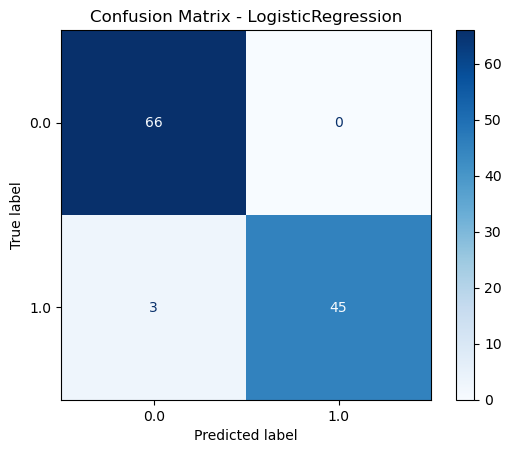

In [320]:
# Draw confusion matrix for the best model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

In [322]:
y_proba_best = best_model.predict_proba(X_test)[:, 1]


ROC Curve for LogisticRegression:


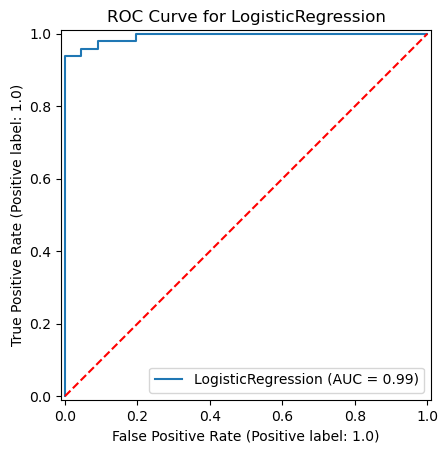

In [324]:
#draw ROC Cuvre
from sklearn.metrics import RocCurveDisplay

if y_proba_best is not None:
    print(f"\nROC Curve for {best_model_name}:")
    RocCurveDisplay.from_estimator(best_model, X_test, y_test)
    plt.title(f'ROC Curve for {best_model_name}')
    plt.plot([0, 1], [0, 1], 'r--') # Random guess line
    plt.show()
else:
    print(f"ROC Curve not available for {best_model_name} (does not support predict_proba).")


In [326]:
import pickle
# Saving model
with open('model.pkl', 'wb') as f:
    pickle.dump(log, f)